In [3]:
import numpy as np
from itertools import combinations
import time
from matplotlib import pyplot as plt
from tqdm import tqdm
import itertools

In [4]:
ops = ['+', '-', '*', '/']
inverse_ops = {'+':'-', '-':'+', '*':'/', '/':'x'}

def make_deck():
    return [1,2,3,4,5,6,7,8,9,10,10,10,10]*4
def create_game(num_cards = 7, digits = 3):
    deck = make_deck()
    np.random.shuffle(deck)
    hand = deck[:num_cards]
    val = list(filter((10).__ne__, deck[num_cards:]))[:digits]
    return hand, sum([val[i] * (10**i) for i in range(digits)])
def bspp(h, v, a = True):
    f, s = brute_speed(h, v)
    if f:
        if a:
            print(brute_pretty_print(s, h))
        else:
            print('Solution Found')
    else:
        print('No Solution Found')
def pretty_print(sol):
    pretty = str(sol[0][0]) if sol[0][1] == '-' else str(-sol[0][0])
    for i, (card, op) in enumerate(sol[1:]):
        if i == 0:
            pretty = pretty + ' ' + inverse_ops[op] + ' ' + str(card)
        else:    
            pretty = '(' + pretty + ') ' + inverse_ops[op] + ' ' + str(card)
    return pretty


def par_sur(p1):
    if p1[0] == '(' and p1[-1] ==  ')':
        count = 0
        change = False
        for c in p1[:-1]:
            if c == '(':
                change = True
                count += 1
            elif c == ')':
                change = True
                count -= 1
            if change:
                if count == 0:
                    return False
        if change:
            return True
        else:
            return False
    else:
        return False
    
def opstr(p1, p2, op, par_red):
    if par_red:
        if op == '*':
            return p1 + ' ' + op + ' ' + p2
        elif op == '+':
            p1 = p1[1:-1] if par_sur(p1) else p1
            p2 = p2[1:-1] if par_sur(p2) else p2
            return '(' + p1 + ' ' + op + ' ' + p2 + ')'
        else:
            return '(' + p1 + ' ' + op + ' ' + p2 + ')'
    else:
        return '(' + p1 + ' ' + op + ' ' + p2 + ')'

def evalop(c1, c2, op):
    if op == '+':
        r = c1 + c2
    elif op == '-':
        r = c1 - c2
    elif op == '*':
        r = c1 * c2
    else:
        r = c1 / c2
    return r
    
def brute_pretty_print(sol, hand, par_red = True):
    if not sol:
        return 'No Solution Found'
    stor = {}
    for card in hand:
        if stor.get(card, False):
            stor[card].append(str(card))
        else:
            stor[card] = [str(card)]
    while sol:
        c1, c2, op = sol.pop()
        if c1 == c2:
            if stor.get(c1, False):
                if len(stor[c1]) > 1:
                    p1 = stor[c1][0]
                    stor[c1] = stor[c1][1:]
                    p2 = stor[c2][0]
                    if len(stor[c2]) > 1:
                        stor[c2] = stor[c2][1:]
                    else:
                        stor.pop(c2)
                    r = evalop(c1, c2, op)
                    if stor.get(r, False):
                        stor[r].append(opstr(p1, p2, op, par_red))
                    else:
                        stor[r] = [opstr(p1, p2, op, par_red)]
                else:
                   sol.insert(1, [c1, c2, op]) 
            else:
                sol.insert(1, [c1, c2, op])
        else:
            if stor.get(c1, False) and stor.get(c2, False):
                p1 = stor[c1][0]
                if len(stor[c1]) > 1:
                    stor[c1] = stor[c1][1:]
                else:
                    stor.pop(c1)
                p2 = stor[c2][0]
                if len(stor[c2]) > 1:
                    stor[c2] = stor[c2][1:]
                else:
                    stor.pop(c2)
                r = evalop(c1, c2, op)
                if stor.get(r, False):
                    stor[r].append(opstr(p1, p2, op, par_red))
                else:
                    stor[r] = [opstr(p1, p2, op, par_red)]
            else:
                sol.insert(1, [c1, c2, op])
    res = stor[list(stor.keys())[0]][0]
    return res[1:-1] if par_sur(res) else res

In [3]:
bspp([10,10,10,10,10,10,3], 328, True)

NameError: name 'brute_speed' is not defined

In [10]:
def brute_speed(hand, val, ops = ['+', '-', '*', '/', '-2', '/2']):
    global sv
    if len(hand) == 1 and val == hand[0]:
        return True, []
    hand.sort()
    key = str(hand)
    #key = [0 if i == 10 else i for i in hand]
    #key = sum([key[i]*(10**i) for i in range(len(key))])
    if sv.get(key, False):
        return False, []
    hand_c = hand.copy()
    combos = set(combinations(hand_c, 2))
    for card2, card1 in combos:
        hand.remove(card1)
        hand.remove(card2)
        for op in ops:
            if op == '*':
                hand.append(card1 * card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 * card2)
            elif op == '+':
                hand.append(card1 + card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 + card2)
            elif op == '-':
                hand.append(card1 - card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 - card2)
            elif op == '-2':
                hand.append(card2 - card1)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card2 - card1)
            elif (not card2 == 0) & (op == '/'):
                hand.append(card1 / card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 / card2)
            elif (not card1 == 0) & (op == '/2'):
                hand.append(card2 / card1)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card2 / card1)
            else:
                continue
            if w:
                hand.append(card1)
                hand.append(card2)
                if op == '-2':
                    l.append([card2, card1, '-'])
                elif op == '/2':
                    l.append([card2, card1, '/'])
                else:
                    l.append([card1, card2, op])
                return True, l
        hand.append(card1)
        hand.append(card2)
    sv[key] = True
    return False, []

In [11]:
possible_vals = [i for i in range(100, 1000)]
possible_vals = [i for i in possible_vals if '0' not in str(i)]
counts = []
tots = []
times_succ = []
times_fail = []
for val in tqdm(possible_vals):
    arr = [4,4,4,4,4,4,4,4,4,100]
    for i in str(val):
        arr[int(i)] -= 1
    sv = {}
    count = 0
    tot = 0
    times = [0,0]
    for i in range(1,11):
        for j in range(i, 11):
            for k in range(j, 11):
                for l in range(k, 11):
                    for m in range(l, 11):
                        for n in range(m, 11):
                            for o in range(n, 11):
                                if sum([(sum([y == x for y in [i,j,k,l,m,n,o]]) - arr[x-1])>0 for x in range(1,11)]) == 0:
                                    tot += 1
                                    start = time.time()
                                    status, sol = brute_speed([i,j,k,l,m,n,o], val)
                                    end = time.time()
                                    if status:
                                        count += 1
                                        times[0] += (end - start)
                                    else:
                                        times[1] += (end - start)
    counts.append(count)
    tots.append(tot)
    times_succ.append(times[0])
    times_fail.append(times[1])
    print('Completed ' + str(val) + ': ' + str(count/tot) + ', ' + str(times[0] + times[1]))

  0%|          | 1/729 [00:28<5:44:44, 28.41s/it]

Completed 111: 0.9991117033089052, 28.35412836074829


  0%|          | 2/729 [00:48<4:43:54, 23.43s/it]

Completed 112: 0.9989131508744196, 19.85162043571472


  0%|          | 2/729 [00:52<5:17:05, 26.17s/it]


KeyboardInterrupt: 

In [10]:
k = 7
N = 10000
count = 0
times = [0,0]
for _ in range(N):
    sv = {}
    h, v = create_game(k, 3)
    start = time.time()
    status, sol = brute_speed(h.copy(), v)
    end = time.time()
    if status:
        count += 1
        times[0] += (end - start)
    else:
        times[1] += (end - start)

print('Solve Percentage: ' + str(count/N))
if not count == 0:
    print('Solve Time: ' + str(times[0]/count))
if not N - count == 0:
    print('Fail Time: ' + str(times[1]/(N - count)))
print('Average Time: ' + str((times[0] + times[1])/N))

Solve Percentage: 0.9878
Solve Time: 0.061026119707952894
Fail Time: 0.38678732660950205
Average Time: 0.0650004064321518


In [15]:
sv = {}
brute_speed([1,2,3,4,5,6,7], 10001)

KeyboardInterrupt: 

In [12]:
sv = {}
brute_speed([1,2,3,4,5,6,7], 10001, ops = ['+', '-'])

(False, [])

In [661]:
sv = {}
def brute_speed_2(hand, val):
    global sv
    if len(hand) == 1:
        if val == hand[0]:
            return True, []
        else:
            return False, []
    hand.sort()
    key = str(hand)
    if sv.get(key, False):
        return False, []
    hand_c = hand.copy()
    combos = set(combinations(hand_c, 2))
    for card2, card1 in combos:
        hand.remove(card1)
        hand.remove(card2)
        for op in ops:
            if op == '*':
                hand.append(card1 * card2)
                w, l = brute_speed(hand, val)
                hand.remove(card1 * card2)
            elif op == '+':
                hand.append(card1 + card2)
                w, l = brute_speed(hand, val)
                hand.remove(card1 + card2)
            elif op == '-':
                hand.append(card1 - card2)
                w, l = brute_speed(hand, val)
                hand.remove(card1 - card2)
            elif op == '-2':
                hand.append(card2 - card1)
                w, l = brute_speed(hand, val)
                hand.remove(card2 - card1)
            elif (not card2 == 0) & (op == '/'):
                hand.append(card1 / card2)
                w, l = brute_speed(hand, val)
                hand.remove(card1 / card2)
            elif (not card1 == 0) & (op == '/2'):
                hand.append(card2 / card1)
                w, l = brute_speed(hand, val)
                hand.remove(card2 / card1)
            else:
                continue
            if w:
                hand.append(card1)
                hand.append(card2)
                if op == '-2':
                    l.append([card2, card1, '-'])
                elif op == '/2':
                    l.append([card2, card1, '/'])
                else:
                    l.append([card1, card2, op])
                return True, l
        hand.append(card1)
        hand.append(card2)
    sv[key] = True
    return False, []

In [664]:
bspp([10,10,10,10,10,8, 4], 679)

(10.0 * (10.0 - 4) + 8.0) * 10 - (10.0 / 10.0)


In [611]:
list(combinations([1,2,3], 2))


[(1, 2), (1, 3), (2, 3)]

In [666]:
bspp([10,10,8,10,3,10,1],632)

10.0 * (10.0 - 3.0) * (10 - 1.0) + 10.0 - 8


In [630]:


sv = {}
def brute_all(hand, val, ops = ['+', '-', '-2', '*', '/', '/2']):
    global sv
    if len(hand) == 1:
        if val == hand[0]:
            return True, [[]]
        else:
            return False, []
    hand.sort()
    key = tuple(hand)#str(hand)#tuple(hand)#str(str(val) + ' ' + str(hand))
    if key in sv:
        return sv[key]
    hand_c = hand.copy()
    combos = set(combinations(hand_c, 2))
    all_sol = []
    for card2, card1 in combos:
        hand.remove(card1)
        hand.remove(card2)
        for op in ops:
            if op == '*':
                hand.append(card1 * card2)
                w, l = brute_all(hand, val)
                hand.remove(card1 * card2)
            elif op == '+':
                hand.append(card1 + card2)
                w, l = brute_all(hand, val)
                hand.remove(card1 + card2)
            elif op == '-':
                hand.append(card1 - card2)
                w, l = brute_all(hand, val)
                hand.remove(card1 - card2)
            elif op == '-2':
                hand.append(card2 - card1)
                w, l = brute_all(hand, val)
                hand.remove(card2 - card1)
            elif (not card2 == 0) & (op == '/'):
                hand.append(card1 / card2)
                w, l = brute_all(hand, val)
                hand.remove(card1 / card2)
            elif (not card1 == 0) & (op == '/2'):
                hand.append(card2 / card1)
                w, l = brute_all(hand, val)
                hand.remove(card2 / card1)
            else:
                continue
            if w:
                #hand.append(card1)
                #hand.append(card2)
                if op == '-2':
                    l = [a + [[card2, card1, '-']] for a in l]
                elif op == '/2':
                    l = [a + [[card2, card1, '/']] for a in l]
                else:
                    l = [a + [[card1, card2, op]] for a in l]
                all_sol.extend(l)
                #l.append([card1, card2, op])
                #return True, l
        hand.append(card1)
        hand.append(card2)
    if len(all_sol) == 0:
        sv[key] = (False, [])
        return False, []
    else:
        sv[key] = (True, all_sol)
        return True, all_sol

In [556]:
sv = {}
def brute_all_count(hand, val):
    global sv
    if len(hand) == 1:
        if val == hand[0]:
            return 1
        else:
            return 0
    hand.sort()
    key = tuple(hand)#str(hand)#tuple(hand)#str(str(val) + ' ' + str(hand))
    if key in sv:
        return sv[key]
    hand_c = hand.copy()
    combos = set(combinations(hand_c, 2))
    all_sol = 0
    for card2, card1 in combos:
        hand.remove(card1)
        hand.remove(card2)
        for op in ops:
            if op == '*':
                hand.append(card1 * card2)
                w = brute_all_count(hand, val)
                hand.remove(card1 * card2)
            elif op == '+':
                hand.append(card1 + card2)
                w = brute_all_count(hand, val)
                hand.remove(card1 + card2)
            elif op == '-':
                hand.append(card1 - card2)
                w = brute_all_count(hand, val)
                hand.remove(card1 - card2)
            elif not card2 == 0:
                hand.append(card1 / card2)
                w = brute_all_count(hand, val)
                hand.remove(card1 / card2)
            else:
                continue
            all_sol += w
        hand.append(card1)
        hand.append(card2)
    sv[key] = all_sol
    return all_sol

In [300]:
test = [[[1,2,'+']]]
test = [a + [[1,2,'+']] for a in test]


In [291]:
all_sol = []
all_sol.extend(test)
all_sol.extend(test)


In [292]:
all_sol

[[[1, 2, '+'], [1, 2, '+']], [[1, 2, '+'], [1, 2, '+']]]

In [549]:
for i in range(100):
    sv = {}
    h, v = create_game()
    solvable, solutions = brute_speed([float(i) for i in h], v)

In [557]:
h = [1,2,3,4,5,6,7]
v = 152
brute_all_count([float(i) for i in h], v)

56939

In [562]:
8000 * 729

5832000

In [567]:
5832000* 33/200 /60/60/16

16.70625

In [629]:
bspp([6,5],1)

6 - 5


In [656]:
h, v = create_game()


In [658]:
%%timeit
sv = {}
brute_speed(h, v)

118 μs ± 661 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [659]:
%%timeit
sv = {}
brute_speed_2(h, v)

117 μs ± 1.56 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [663]:
%%timeit
sv = {}
brute_speed_2(h, v)

116 μs ± 1.16 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [648]:
%%timeit
sv = {}
brute_speed(*[[float(i) for i in a] if j == 0 else a for j,a in enumerate(create_game())])

The slowest run took 10.51 times longer than the fastest. This could mean that an intermediate result is being cached.
277 ms ± 142 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [650]:
%%timeit
sv = {}
brute_speed(*[[float(i) for i in a] if j == 0 else a for j,a in enumerate(create_game())])

The slowest run took 4.43 times longer than the fastest. This could mean that an intermediate result is being cached.
261 ms ± 122 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [652]:
%%timeit
sv = {}
brute_speed_2(*[[float(i) for i in a] if j == 0 else a for j,a in enumerate(create_game())])

The slowest run took 7.10 times longer than the fastest. This could mean that an intermediate result is being cached.
164 ms ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [600]:
num_solutions = {}
for i in range(200):
    sv = {}
    h, v = create_game()
    solvable = brute_all_count([float(i) for i in h], v)
    num_solutions[str(v) + ' ' + str(h)] = solvable


In [602]:
a = np.array(list(num_solutions.values()))
a.sort()

In [604]:
num_solutions

{'392 [9, 10, 10, 6, 10, 7, 10]': 537,
 '549 [2, 6, 6, 10, 9, 10, 10]': 1698,
 '266 [1, 3, 1, 5, 4, 7, 10]': 19496,
 '996 [6, 7, 5, 1, 3, 9, 7]': 1093,
 '382 [5, 9, 10, 1, 5, 4, 2]': 5097,
 '275 [2, 6, 9, 2, 5, 4, 1]': 18549,
 '612 [6, 5, 6, 3, 7, 10, 10]': 7075,
 '739 [10, 8, 9, 10, 1, 9, 2]': 3364,
 '658 [4, 9, 9, 3, 10, 7, 2]': 5390,
 '417 [6, 10, 5, 4, 10, 10, 2]': 956,
 '214 [9, 10, 7, 10, 7, 3, 10]': 3929,
 '479 [7, 3, 6, 6, 3, 1, 10]': 1738,
 '311 [10, 10, 5, 3, 2, 3, 9]': 3026,
 '553 [2, 2, 10, 10, 6, 4, 10]': 27,
 '473 [2, 5, 9, 3, 10, 1, 10]': 5160,
 '596 [10, 10, 2, 10, 4, 2, 5]': 1726,
 '355 [10, 8, 7, 1, 7, 7, 9]': 2905,
 '958 [8, 2, 3, 6, 6, 7, 4]': 1151,
 '385 [4, 3, 10, 1, 2, 6, 10]': 7568,
 '134 [10, 4, 2, 2, 6, 10, 2]': 11755,
 '837 [10, 1, 10, 1, 7, 10, 6]': 150,
 '434 [3, 10, 1, 6, 9, 1, 10]': 851,
 '273 [5, 10, 7, 9, 3, 1, 10]': 22643,
 '241 [6, 7, 9, 10, 10, 5, 5]': 5032,
 '791 [10, 7, 4, 10, 3, 8, 10]': 1260,
 '829 [2, 10, 10, 8, 5, 9, 10]': 1271,
 '169 [10, 10, 

In [633]:
sol, solutions = brute_all([3,10,4,9,5,10,6], 217)

In [635]:
brute_pretty_print(solutions[0], [3,10,4,9,5,10,6])


'((10 + 9) / (5 - 3) + 6) * (10 + 4)'

In [642]:
solutions[1000]

[[220, 3, '-'], [22, 10, '*'], [17, 5, '+']]

In [636]:
brute_pretty_print(solutions[1000], [3,10,4,9,5,10,6])

KeyboardInterrupt: 

In [609]:
brute_all([8.0,10.0,10.0,4.0,10.0,10.0,10.0], 579)

(True,
 [[[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [48.0, 10.0, '+'],
   [8.0, 6.0, '*'],
   [10.0, 10.0, '/'],
   [10.0, 4.0, '-']],
  [[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [48.0, 10.0, '+'],
   [10.0, 10.0, '/'],
   [8.0, 6.0, '*'],
   [10.0, 4.0, '-']],
  [[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [10.0, 10.0, '/'],
   [48.0, 10.0, '+'],
   [8.0, 6.0, '*'],
   [10.0, 4.0, '-']],
  [[580.0, 1.0, '-'],
   [10.0, 10.0, '/'],
   [58.0, 10.0, '*'],
   [48.0, 10.0, '+'],
   [8.0, 6.0, '*'],
   [10.0, 4.0, '-']],
  [[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [50.0, 8.0, '+'],
   [40.0, 10.0, '+'],
   [10.0, 10.0, '/'],
   [10.0, 4.0, '*']],
  [[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [40.0, 18.0, '+'],
   [10.0, 8.0, '+'],
   [10.0, 10.0, '/'],
   [10.0, 4.0, '*']],
  [[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [48.0, 10.0, '+'],
   [40.0, 8.0, '+'],
   [10.0, 10.0, '/'],
   [10.0, 4.0, '*']],
  [[580.0, 1.0, '-'],
   [58.0, 10.0, '*'],
   [50.0, 8.0, '+'],
   [10.0, 10.0,

(array([54., 22., 18., 13., 18.,  4.,  5.,  4.,  6.,  6.,  6.,  2.,  2.,
         4.,  4.,  2.,  2.,  1.,  4.,  2.,  2.,  3.,  0.,  1.,  1.,  1.,
         1.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,   783.5,  1567. ,  2350.5,  3134. ,  3917.5,  4701. ,
         5484.5,  6268. ,  7051.5,  7835. ,  8618.5,  9402. , 10185.5,
        10969. , 11752.5, 12536. , 13319.5, 14103. , 14886.5, 15670. ,
        16453.5, 17237. , 18020.5, 18804. , 19587.5, 20371. , 21154.5,
        21938. , 22721.5, 23505. , 24288.5, 25072. , 25855.5, 26639. ,
        27422.5, 28206. , 28989.5, 29773. , 30556.5, 31340. , 32123.5,
        

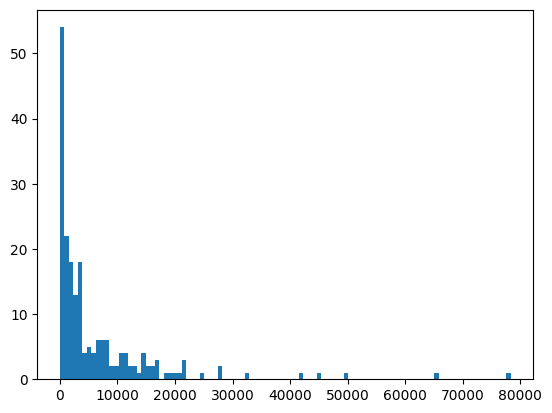

In [592]:
plt.hist(num_solutions, bins = 100)


In [589]:
sv = {}
for i in range(200):
    h, v = create_game()
    solvable = brute_speed([float(i) for i in h], 237)

In [546]:
for i in range(100):
    sv = {}
    h, v = create_game()
    solvable, solutions = brute_all(h, v)
    for sol in solutions:
        assert eval(brute_pretty_print(sol, h, par_red = False)) == v

In [18]:
import json

In [5]:
sv = {}
def brute_speed(hand, val, ops = ['+', '-', '*', '/', '-2', '/2']):
    global sv
    if len(hand) == 1 and val == hand[0]:
        return True, []
    hand.sort()
    key = str(hand)
    if sv.get(key, False):
        return False, []
    hand_c = hand.copy()
    combos = set(combinations(hand_c, 2))
    for card2, card1 in combos:
        hand.remove(card1)
        hand.remove(card2)
        for op in ops:
            if op == '*':
                hand.append(card1 * card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 * card2)
            elif op == '+':
                hand.append(card1 + card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 + card2)
            elif op == '-':
                hand.append(card1 - card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 - card2)
            elif op == '-2':
                hand.append(card2 - card1)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card2 - card1)
            elif (not card2 == 0) & (op == '/'):
                hand.append(card1 / card2)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card1 / card2)
            elif (not card1 == 0) & (op == '/2'):
                hand.append(card2 / card1)
                w, l = brute_speed(hand, val, ops = ops)
                hand.remove(card2 / card1)
            else:
                continue
            if w:
                hand.append(card1)
                hand.append(card2)
                if op == '-2':
                    l.append([card2, card1, '-'])
                elif op == '/2':
                    l.append([card2, card1, '/'])
                else:
                    l.append([card1, card2, op])
                return True, l
        hand.append(card1)
        hand.append(card2)
    sv[key] = True
    return False, []

In [10]:
possible_vals = [i for i in range(100, 1000)]
possible_vals = [i for i in possible_vals if '0' not in str(i)]
solution_storage = {}
counts = []
tots = []
times_succ = []
times_fail = []
for val in tqdm(possible_vals):
    arr = [4,4,4,4,4,4,4,4,4,100]
    for i in str(val):
        arr[int(i)] -= 1
    sv = {}
    count = 0
    tot = 0
    times = [0,0]
    for i in range(1,11):
        for j in range(i, 11):
            for k in range(j, 11):
                for l in range(k, 11):
                    for m in range(l, 11):
                        for n in range(m, 11):
                            for o in range(n, 11):
                                if sum([(sum([y == x for y in [i,j,k,l,m,n,o]]) - arr[x-1])>0 for x in range(1,11)]) == 0:
                                    tot += 1
                                    start = time.time()
                                    hand = [i,j,k,l,m,n,o]
                                    hand_float = [float(i) for i in hand]
                                    status, sol = brute_speed(hand_float, val)
                                    end = time.time()
                                    if status:
                                        count += 1
                                        times[0] += (end - start)
                                    else:
                                        times[1] += (end - start)
                                    solution_storage[str(hand)] = solution_storage.get(str(hand), []) + [val]
                                    #solution_storage[val][str([int(i) for i in hand])] = (status, solutions)
    counts.append(count)
    tots.append(tot)
    times_succ.append(times[0])
    times_fail.append(times[1])
    print('Completed ' + str(val) + ': ' + str(count/tot) + ', ' + str(times[0] + times[1]))
    if val == 112:
        break
with open('solution_storage.json', 'w') as f:
    json.dump(solution_storage, f)


  0%|          | 1/729 [00:19<3:55:22, 19.40s/it]

Completed 111: 0.9991117033089052, 19.32907462120056


  0%|          | 1/729 [00:32<6:38:51, 32.87s/it]

Completed 112: 0.9989131508744196, 13.38202452659607


NameError: name 'json' is not defined

In [521]:
solvable

True

In [522]:
len(solutions)

56939

In [523]:
set([len(solutions[i]) for i in range(len(solutions))])

{6}

In [526]:
num = 0
for sol in solutions:
    try:
        sol_c = sol.copy()
        if eval(brute_pretty_print(sol_c, h, par_red = False)) == 152:
            num += 1
        else:
            print(sol)
    except:
        print(sol)

In [527]:
num

56939

In [528]:
brute_pretty_print([[24.0, 6.333333333333333, '*'], [5.0, 1.3333333333333333, '+'], [8.0, 6.0, '/'], [7.0, 1.0, '+'], [3.0, 2.0, '*'], [6.0, 4.0, '*']], h, par_red = False)

'(6.0 * 4.0) * (5.0 + ((7.0 + 1.0) / (3.0 * 2.0)))'

In [529]:
eval('(6.0 * 4.0) * (5.0 + ((7.0 + 1.0) / (3.0 * 2.0)))')

152.0

In [530]:
len(solutions)

56939

In [333]:
brute_pretty_print(solutions[1], h)


'(7.0 * 2.0 - 1.0) * (6.0 + 5.0) * (4.0 + 3.0)'

In [63]:
from collections import Counter
from itertools import combinations_with_replacement

def generate_unique_pairs_with_remainder(nums):
    """
    Generate all unique pairs from a list and the corresponding remainders.
    
    Args:
        nums: A list of numbers, potentially with duplicates
        
    Returns:
        A list of tuples, where each tuple contains a pair and the remaining elements
    """
    counter = Counter(nums)
    
    result = []
    # Generate all unique pairs (including potential duplicates like [3,3])
    for pair in combinations_with_replacement(sorted(counter.keys()), 2):
        # Skip pairs of the same element if there aren't enough occurrences
        if pair[0] == pair[1] and counter[pair[0]] < 2:
            continue
        
        # Calculate the remainder by removing the pair elements
        remainder = nums.copy()
        remainder.remove(pair[0])
        remainder.remove(pair[1])
        
        result.append((list(pair), remainder))
    
    return result

# Example usage
nums = [1, 2, 3, 3, 5, 6, 6]
result = generate_unique_pairs_with_remainder(nums)
print(result)
print(len(result))

[([1, 2], [3, 3, 5, 6, 6]), ([1, 3], [2, 3, 5, 6, 6]), ([1, 5], [2, 3, 3, 6, 6]), ([1, 6], [2, 3, 3, 5, 6]), ([2, 3], [1, 3, 5, 6, 6]), ([2, 5], [1, 3, 3, 6, 6]), ([2, 6], [1, 3, 3, 5, 6]), ([3, 3], [1, 2, 5, 6, 6]), ([3, 5], [1, 2, 3, 6, 6]), ([3, 6], [1, 2, 3, 5, 6]), ([5, 6], [1, 2, 3, 3, 6]), ([6, 6], [1, 2, 3, 3, 5])]
12


In [192]:
generate_unique_pairs_with_remainder([1,2,3])

[([1, 2], [3]), ([1, 3], [2]), ([2, 3], [1])]

In [193]:
generate_unique_pairs_with_remainder([1,3,2])

[([1, 2], [3]), ([1, 3], [2]), ([2, 3], [1])]

In [196]:
generate_unique_pairs_with_remainder([1,2,3,3,4,4,5,6,7,7,7])

[([1, 2], [3, 3, 4, 4, 5, 6, 7, 7, 7]),
 ([1, 3], [2, 3, 4, 4, 5, 6, 7, 7, 7]),
 ([1, 4], [2, 3, 3, 4, 5, 6, 7, 7, 7]),
 ([1, 5], [2, 3, 3, 4, 4, 6, 7, 7, 7]),
 ([1, 6], [2, 3, 3, 4, 4, 5, 7, 7, 7]),
 ([1, 7], [2, 3, 3, 4, 4, 5, 6, 7, 7]),
 ([2, 3], [1, 3, 4, 4, 5, 6, 7, 7, 7]),
 ([2, 4], [1, 3, 3, 4, 5, 6, 7, 7, 7]),
 ([2, 5], [1, 3, 3, 4, 4, 6, 7, 7, 7]),
 ([2, 6], [1, 3, 3, 4, 4, 5, 7, 7, 7]),
 ([2, 7], [1, 3, 3, 4, 4, 5, 6, 7, 7]),
 ([3, 3], [1, 2, 4, 4, 5, 6, 7, 7, 7]),
 ([3, 4], [1, 2, 3, 4, 5, 6, 7, 7, 7]),
 ([3, 5], [1, 2, 3, 4, 4, 6, 7, 7, 7]),
 ([3, 6], [1, 2, 3, 4, 4, 5, 7, 7, 7]),
 ([3, 7], [1, 2, 3, 4, 4, 5, 6, 7, 7]),
 ([4, 4], [1, 2, 3, 3, 5, 6, 7, 7, 7]),
 ([4, 5], [1, 2, 3, 3, 4, 6, 7, 7, 7]),
 ([4, 6], [1, 2, 3, 3, 4, 5, 7, 7, 7]),
 ([4, 7], [1, 2, 3, 3, 4, 5, 6, 7, 7]),
 ([5, 6], [1, 2, 3, 3, 4, 4, 7, 7, 7]),
 ([5, 7], [1, 2, 3, 3, 4, 4, 6, 7, 7]),
 ([6, 7], [1, 2, 3, 3, 4, 4, 5, 7, 7]),
 ([7, 7], [1, 2, 3, 3, 4, 4, 5, 6, 7])]

In [198]:
import random
test = [1,2,3,3,4,4,5,6,7,7,7]
random.shuffle(test)
generate_unique_pairs_with_remainder(test)

[([1, 2], [4, 3, 7, 3, 5, 6, 4, 7, 7]),
 ([1, 3], [4, 7, 3, 5, 6, 4, 2, 7, 7]),
 ([1, 4], [3, 7, 3, 5, 6, 4, 2, 7, 7]),
 ([1, 5], [4, 3, 7, 3, 6, 4, 2, 7, 7]),
 ([1, 6], [4, 3, 7, 3, 5, 4, 2, 7, 7]),
 ([1, 7], [4, 3, 3, 5, 6, 4, 2, 7, 7]),
 ([2, 3], [4, 7, 3, 1, 5, 6, 4, 7, 7]),
 ([2, 4], [3, 7, 3, 1, 5, 6, 4, 7, 7]),
 ([2, 5], [4, 3, 7, 3, 1, 6, 4, 7, 7]),
 ([2, 6], [4, 3, 7, 3, 1, 5, 4, 7, 7]),
 ([2, 7], [4, 3, 3, 1, 5, 6, 4, 7, 7]),
 ([3, 3], [4, 7, 1, 5, 6, 4, 2, 7, 7]),
 ([3, 4], [7, 3, 1, 5, 6, 4, 2, 7, 7]),
 ([3, 5], [4, 7, 3, 1, 6, 4, 2, 7, 7]),
 ([3, 6], [4, 7, 3, 1, 5, 4, 2, 7, 7]),
 ([3, 7], [4, 3, 1, 5, 6, 4, 2, 7, 7]),
 ([4, 4], [3, 7, 3, 1, 5, 6, 2, 7, 7]),
 ([4, 5], [3, 7, 3, 1, 6, 4, 2, 7, 7]),
 ([4, 6], [3, 7, 3, 1, 5, 4, 2, 7, 7]),
 ([4, 7], [3, 3, 1, 5, 6, 4, 2, 7, 7]),
 ([5, 6], [4, 3, 7, 3, 1, 4, 2, 7, 7]),
 ([5, 7], [4, 3, 3, 1, 6, 4, 2, 7, 7]),
 ([6, 7], [4, 3, 3, 1, 5, 4, 2, 7, 7]),
 ([7, 7], [4, 3, 3, 1, 5, 6, 4, 2, 7])]

In [98]:
%timeit (5.1).is_integer()


43.5 ns ± 0.301 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [99]:
%timeit (5.1 == int(5.0))


39.6 ns ± 0.32 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [95]:
%timeit (5.1 % 1 == 0)

27.5 ns ± 0.344 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [97]:
5 % 1 == 0

True

In [218]:
def insert_sorted_card(cards, card):
    for i, c in enumerate(cards):
        if c > card:
            return cards[:i] + [card] + cards[i:]
    return cards + [card]
def full_explore(hand):
    if len(hand) == 1:
        if hand[0] % 1 == 0 and hand[0] > 0:
            return [int(hand[0])]
        else:
            return []
    combos = generate_unique_pairs_with_remainder(hand)
    possibilities = []
    for cards, remaining in combos:
        possibilities.extend(full_explore(insert_sorted_card(remaining, cards[0] + cards[1])))
        possibilities.extend(full_explore(insert_sorted_card(remaining, cards[0] - cards[1])))
        possibilities.extend(full_explore(insert_sorted_card(remaining, cards[1] - cards[0])))
        possibilities.extend(full_explore(insert_sorted_card(remaining, cards[0] * cards[1])))
        if cards[1] != 0:
            possibilities.extend(full_explore(insert_sorted_card(remaining, cards[0] / cards[1])))
        if cards[0] != 0:
            possibilities.extend(full_explore(insert_sorted_card(remaining, cards[1] / cards[0])))
    return list(set(possibilities))
def full_explore_2(hand, sv = {}):
    if len(hand) == 1:
        if hand[0] % 1 == 0 and hand[0] > 0:
            return sv, [int(hand[0])]
        else:
            return sv, []
    key = str(hand)
    if key in sv:
        return sv, sv[key]
    combos = generate_unique_pairs_with_remainder(hand)
    possibilities = []
    for cards, remaining in combos:
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] + cards[1]), sv)
        possibilities.extend(l)
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] - cards[1]), sv)
        possibilities.extend(l)
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[1] - cards[0]), sv)
        possibilities.extend(l)
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] * cards[1]), sv)
        possibilities.extend(l)
        if cards[1] != 0:
            sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] / cards[1]), sv)
            possibilities.extend(l)
        if cards[0] != 0:
            sv, l = full_explore_2(insert_sorted_card(remaining, cards[1] / cards[0]), sv)
            possibilities.extend(l)
    sv[key] = list(set(possibilities))
    return sv, sv[key]
def full_explore_3(hand, l = set(), sv = {}):
    if len(hand) == 1:
        if hand[0] % 1 == 0 and hand[0] > 0:
            l.add(int(hand[0]))
            return sv, l
    key = str(hand)
    if key in sv:
        return sv, l
    sv[key] = True
    combos = generate_unique_pairs_with_remainder(hand)
    possibilities = []
    for cards, remaining in combos:
        sv, l = full_explore_3(insert_sorted_card(remaining, cards[0] + cards[1]), l, sv)
        sv, l = full_explore_3(insert_sorted_card(remaining, cards[0] - cards[1]), l, sv)   
        sv, l = full_explore_3(insert_sorted_card(remaining, cards[1] - cards[0]), l, sv)
        sv, l = full_explore_3(insert_sorted_card(remaining, cards[0] * cards[1]), l, sv)
        if cards[1] != 0:
            sv, l = full_explore_3(insert_sorted_card(remaining, cards[0] / cards[1]), l, sv)
        if cards[0] != 0:
            sv, l = full_explore_3(insert_sorted_card(remaining, cards[1] / cards[0]), l, sv)
    return sv, l
def full_explore_4(hand, sv = {}):
    if len(hand) == 1:
        if hand[0] % 1 == 0 and hand[0] > 110 and hand[0] < 1000:
            return sv, [int(hand[0])]
        else:
            return sv, []
    key = str(hand)
    if key in sv:
        return sv, sv[key]
    combos = generate_unique_pairs_with_remainder(hand)
    possibilities = []
    for cards, remaining in combos:
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] + cards[1]), sv)
        possibilities.extend(l)
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] - cards[1]), sv)
        possibilities.extend(l)
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[1] - cards[0]), sv)
        possibilities.extend(l)
        sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] * cards[1]), sv)
        possibilities.extend(l)
        if cards[1] != 0:
            sv, l = full_explore_2(insert_sorted_card(remaining, cards[0] / cards[1]), sv)
            possibilities.extend(l)
        if cards[0] != 0:
            sv, l = full_explore_2(insert_sorted_card(remaining, cards[1] / cards[0]), sv)
            possibilities.extend(l)
    sv[key] = list(set(possibilities))
    return sv, sv[key]


In [199]:
arr = [4,4,4,4,4,4,4,4,4,100]
hands = []
for i in range(1,11):
    for j in range(i, 11):
        for k in range(j, 11):
            for l in range(k, 11):
                for m in range(l, 11):
                    for n in range(m, 11):
                        for o in range(n, 11):
                            if sum([(sum([y == x for y in [i,j,k,l,m,n,o]]) - arr[x-1])>0 for x in range(1,11)]) == 0:
                                hands.append([i,j,k,l,m,n,o])


In [215]:
arr = [4,4,4,4,4,4,4,4,4,100]
hands = []
for i in range(1,11):
    for j in range(i, 11):
        for k in range(j, 11):
            for l in range(k, 11):
                for m in range(l, 11):
                    for n in range(m, 11):
                        for o in range(n, 11):
                            if sum([(sum([y == x for y in [i,j,k,l,m,n,o]]) - arr[x-1])>0 for x in range(1,11)]) == 0:
                                hands.append([float(i),float(j),float(k),float(l),float(m),float(n),float(o)])

In [216]:
len(hands)

10945

In [187]:
len(full_explore_3([1.0,2.0,3.0,4.0,5.0,6.0], set(), {})[1])

549

In [156]:
len(full_explore([1,2,3,4,5,6]))

549

In [221]:
len(full_explore_4([1.0,2.0,3.0,4.0,5.0,6.0,7.0], {})[1])

2936

In [223]:
from itertools import permutations

def can_generate_expression(l, v, epsilon=1e-10):
    def all_expressions(nums):
        if len(nums) == 1:
            return [(nums[0], str(nums[0]))]
        
        result = []
        for i in range(1, len(nums)):
            left_parts = all_expressions(nums[:i])
            right_parts = all_expressions(nums[i:])
            
            for left_val, left_expr in left_parts:
                for right_val, right_expr in right_parts:
                    result.append((left_val + right_val, f"({left_expr} + {right_expr})"))
                    result.append((left_val - right_val, f"({left_expr} - {right_expr})"))
                    result.append((left_val * right_val, f"({left_expr} * {right_expr})"))
                    if right_val != 0:
                        result.append((left_val / right_val, f"({left_expr} / {right_expr})"))
        
        return result
    
    for perm in permutations(l):
        expressions = all_expressions(perm)
        for val, expr in expressions:
            if abs(val - v) < epsilon:
                # Remove unnecessary outer parentheses
                while expr.startswith('(') and expr.endswith(')'):
                    try:
                        eval(expr[1:-1])  # Check if the expression without outer parentheses is valid
                        expr = expr[1:-1]
                    except:
                        break
                return True, expr
    
    return False, None

In [228]:
can_generate_expression([10,10,10,10,10,10,10], 152, epsilon=1e-10)

KeyboardInterrupt: 

In [227]:
bspp([10,10,10,10,10,10,10], 152, True)

No Solution Found


In [217]:
sv, l = full_explore_2([1.0,2.0,3.0,4.0,5.0,6.0,7.0], {})
all_hands = {}
for hand in tqdm(hands):
    sv, l = full_explore_2(hand, sv)
    all_hands[str(hand)] = l

  3%|▎         | 282/10945 [00:23<14:48, 12.00it/s]


KeyboardInterrupt: 

In [213]:
sv

{'[9.0, 12.0]': [3, 108, 21],
 '[0.0, 9.0]': [9],
 '[9.0, 36.0]': [4, 27, 324, 45],
 '[1.0, 9.0]': [8, 9, 10],
 '[6.0, 15.0]': [9, 90, 21],
 '[-3.0, 6.0]': [9, 3],
 '[3.0, 6.0]': [2, 9, 18, 3],
 '[6.0, 54.0]': [48, 9, 60, 324],
 '[0.6666666666666666, 6.0]': [9, 4],
 '[1.5, 6.0]': [9, 4],
 '[6.0, 6.0, 9.0]': [2, 3, 4, 324, 8, 9, 10, 108, 45, 48, 18, 21, 90, 27, 60],
 '[5.0, 6.0]': [1, 11, 30],
 '[-7.0, 6.0]': [13],
 '[6.0, 7.0]': [1, 42, 13],
 '[-6.0, 6.0]': [12],
 '[-0.16666666666666666, 6.0]': [],
 '[-1.0, 12.0]': [11, 13],
 '[-1.0, 0.0]': [1],
 '[-1.0, 36.0]': [35, 37],
 '[-1.0, 1.0]': [2],
 '[-1.0, 6.0, 6.0]': [1, 2, 35, 37, 42, 11, 12, 13, 30],
 '[-5.0, 6.0]': [1, 11],
 '[6.0, 6.0]': [1, 12, 36],
 '[0.16666666666666666, 6.0]': [1, 36],
 '[1.0, 12.0]': [11, 12, 13],
 '[0.0, 1.0]': [1],
 '[1.0, 36.0]': [35, 36, 37],
 '[1.0, 1.0]': [1, 2],
 '[1.0, 6.0, 6.0]': [1, 2, 35, 36, 37, 42, 11, 12, 13, 30],
 '[12.0, 20.0]': [32, 8, 240],
 '[0.0, 20.0]': [20],
 '[20.0, 36.0]': [56, 16, 720],
 '

In [68]:
sevens = generate_unique_pairs_with_remainder(list(range(7)))

In [72]:
def fast_unique_pairs(nums):
    return [(nums[a], nums[b]) for a,b in sevens]

In [73]:
fast_unique_pairs(np.arange(1, 8))

[(array([1, 2]), array([3, 4, 5, 6, 7])),
 (array([1, 3]), array([2, 4, 5, 6, 7])),
 (array([1, 4]), array([2, 3, 5, 6, 7])),
 (array([1, 5]), array([2, 3, 4, 6, 7])),
 (array([1, 6]), array([2, 3, 4, 5, 7])),
 (array([1, 7]), array([2, 3, 4, 5, 6])),
 (array([2, 3]), array([1, 4, 5, 6, 7])),
 (array([2, 4]), array([1, 3, 5, 6, 7])),
 (array([2, 5]), array([1, 3, 4, 6, 7])),
 (array([2, 6]), array([1, 3, 4, 5, 7])),
 (array([2, 7]), array([1, 3, 4, 5, 6])),
 (array([3, 4]), array([1, 2, 5, 6, 7])),
 (array([3, 5]), array([1, 2, 4, 6, 7])),
 (array([3, 6]), array([1, 2, 4, 5, 7])),
 (array([3, 7]), array([1, 2, 4, 5, 6])),
 (array([4, 5]), array([1, 2, 3, 6, 7])),
 (array([4, 6]), array([1, 2, 3, 5, 7])),
 (array([4, 7]), array([1, 2, 3, 5, 6])),
 (array([5, 6]), array([1, 2, 3, 4, 7])),
 (array([5, 7]), array([1, 2, 3, 4, 6])),
 (array([6, 7]), array([1, 2, 3, 4, 5]))]

In [66]:
%timeit generate_unique_pairs_with_remainder(list(range(7)))

7.07 μs ± 55.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [74]:
%timeit fast_unique_pairs(np.arange(1, 8))

32.5 μs ± 216 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [41]:
len(combos), len(set(combos))

(21, 21)

In [50]:
np.arange(7)[list(combos)[0]]

IndexError: too many indices for array: array is 1-dimensional, but 5 were indexed

In [24]:
list(combos)[0]

(0, 1, 3, 4, 5)

In [13]:
len(sv)

2019

In [17]:
list(combinations([1,2,10,10], 2))

[(1, 2), (1, 10), (1, 10), (2, 10), (2, 10), (10, 10)]